In [1]:
import tifffile
import numpy as np
import h5py
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Creating the Training Image Database

We create the training image database by extracting sub-volumes from a the original large images at a specific overlap.

### Loading the training image

In [8]:
#You have to have unzipped the tif image first.
img = cv2.imread("D:/AV_Pro/training_images_2D/berea.tif000.jpeg")
print(img.shape)

(400, 400, 3)


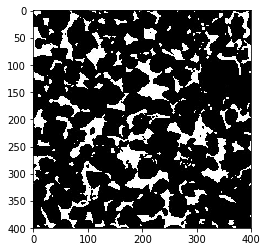

In [10]:
#Let's plot the typical image size so we can get an idea how big the images will be.
plt.imshow(img, cmap="Greys")

In [12]:
count = 0

edge_length = 96 #image dimensions
stride = 4 #stride at which images are extracted

N = edge_length
M = edge_length
O = edge_length

I_inc = stride
J_inc = stride
K_inc = stride

#Have to have this directory to create dataset
target_direc = "D:/AV_Pro/training_images_2Dx"

for i in range(0, img.shape[0], I_inc):
    for j in range(0, img.shape[1], J_inc):
            subset = img[ i : i+N, j : j+M ]
            if subset.shape == (N, M):
                f = h5py.File(target_direc+str(count)+".jpg", "w")
                f.create_dataset('data', data=subset, dtype="i8", compression="gzip")
                f.close()
                count += 1
print(count)

#hdf5

0


In [5]:
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 23 18:19:09 2018
@author: Administrator
"""
 
import os
from PIL import Image
 
# 切割图片
def splitimage(src, rownum, colnum, dstpath):
    img = Image.open(src)
    w, h = img.size
    if rownum <= h and colnum <= w:
        print('Original image info: %sx%s, %s, %s' % (w, h, img.format, img.mode))
        print('图片切割')
 
        s = os.path.split(src)
        if dstpath == '':
            dstpath = s[0]
        fn = s[1].split('.')
        basename = fn[0]
        ext = fn[-1]
 
        num = 0
        rowheight = h // rownum
        colwidth = w // colnum
        for r in range(rownum):
            for c in range(colnum):
                box = (c * colwidth, r * rowheight, (c + 1) * colwidth, (r + 1) * rowheight)
                img.crop(box).save(os.path.join(dstpath, basename + '_' + str(num) + '.' + ext), ext)
                num = num + 1
 
        print('共生成 %s 张小图片。' % num)
    else:
        print('error')
 
# 创建文件夹
def mkdir(path):
    # 去除首位空格
    path = path.strip()
    # 去除尾部 \ 符号
    path = path.rstrip("\\")
 
    # 判断路径是否存在
    # 存在     True
    # 不存在   False
    isExists = os.path.exists(path)
 
    # 判断结果
    if not isExists:
        os.makedirs(path)
        print (path+' 创建成功')
        return True
    else:
        print (path + ' 目录已存在')
        return False
 
 
folder = r"D:/AV_Pro/training_images_2D" # 存放图片的文件夹
path = os.listdir(folder)
# print(path)
mkpath = "D:/AV_Pro/xxx"
for each_bmp in path: # 批量操作
        first_name, second_name = os.path.splitext(each_bmp)
        each_bmp = os.path.join(folder, each_bmp)
        src = each_bmp
        print(src)
        print(first_name)
        # 定义要创建的目录
        #mkpath = "D:/AV_Pro/"
        # 调用函数
        #mkdir(mkpath)
        if os.path.isfile(src):
            dstpath = mkpath
            if (dstpath == '') or os.path.exists(dstpath):
                row = int(4) # 切割行数
                col = int(4) # 切割列数
                if row > 0 and col > 0:
                    splitimage(src, row, col, dstpath)
                else:
                    print('无效的')
            else:
                print('图片保存目录 %s 不存在！' % dstpath)
        else:
            print('图片文件 %s 不存在！' % src)


D:/AV_Pro/training_images_2D\rock (1).jpeg
rock (1)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (10).jpeg
rock (10)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (100).jpeg
rock (100)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (101).jpeg
rock (101)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (102).jpeg
rock (102)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (103).jpeg
rock (103)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (104).jpeg
rock (104)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (105).jpeg
rock (105)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (106).jpeg
rock (106)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (107).jpeg
rock (107)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (108).jpeg
rock (108)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_images_2D\rock (109).jpeg
rock (109)
图片保存目录 D:/AV_Pro/xxx 不存在！
D:/AV_Pro/training_ima

In [4]:
import os
from PIL import Image
 
filename = os.listdir("D:/AV_Pro/xxx")
base_dir = "D:/AV_Pro/xxx"
new_dir  = "D:/AV_Pro/change_"
size_m = 96
size_n = 96
 
for img in filename:
    image = Image.open(base_dir + '/' + img)
    image_size = image.resize((size_m, size_n),Image.ANTIALIAS)
    image_size.save(new_dir+ img)
